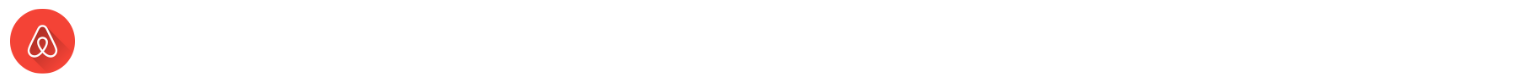

# **Analisis Strategi Adaptasi dan Optimasi Listing Airbnb Bangkok: Dampak COVID-19 terhadap Rating, Layanan Host, dan Harga**

Oleh: Nabila Lailinajma

## **Overview:**
- Business Understanding
- Data Understanding and Data Cleaning
- Data Analysis
- References

## **Business Understanding**

### **Background**

Airbnb, sebagai platform global untuk penyewaan akomodasi berbasis komunitas, telah merevolusi cara orang berpergian dan menginap. Di Bangkok, yang merupakan salah satu destinasi pariwisata terbesar di Asia Tenggara, Airbnb memberikan peluang besar bagi para pemilik properti untuk memanfaatkan potensi pasar wisatawan yang terus berkembang. Dengan menawarkan berbagai pilihan akomodasi, mulai dari apartemen modern hingga rumah tradisional, Airbnb telah mengubah dinamika industri perhotelan lokal.

### **Pernyataan Masalah**

1. **Perbedaan Rating Antar Wilayah**: Bagaimana Karakteristik Properti dan Performa Host Menjelaskan Variasi Rating di Berbagai Wilayah?

2. **Perubahan Preferensi Lokasi Tamu**: Bagaimana Pandemi COVID-19 Mempengaruhi Pilihan Tamu terhadap Properti?

3. **Perubahan Pola Musiman:** Bagaimana Pola Musiman Mempengaruhi Strategi Pemasaran Properti Airbnb di Bangkok Sebelum dan Setelah Pandemi COVID-19?

## **Data Understanding and Data Cleaning**

Sebelum memulai analisis data, sangat penting untuk mengeksplorasi dan mempersiapkan dataset secara menyeluruh. Proses ini mencakup peninjauan struktur dataset, penentuan jenis variabel, serta identifikasi data yang hilang atau tidak konsisten. Wawasan awal diperoleh melalui statistik deskriptif, diikuti dengan proses pembersihan data untuk mengatasi masalah seperti nilai yang hilang atau inkonsistensi. Persiapan ini memastikan bahwa dataset akurat, lengkap, dan siap digunakan untuk analisis yang andal.

### **Importing Libraries and Dataset**

#### **Importing Libraries and Initial Setup**

In [1450]:
# Cleaning and data manipulation
import pandas as pd
import numpy as np
import datetime

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
import geopandas as gpd
from geopy.distance import geodesic

# Statistic test
import scipy.stats as stats

# Other libraries
import warnings
warnings.filterwarnings("ignore")

- **Pandas** dan **NumPy** digunakan untuk pembersihan dan manipulasi data, sehingga memungkinkan pengelolaan dataset secara efektif.  
- Untuk visualisasi data, **Seaborn**, **Matplotlib**, dan **Folium** dimanfaatkan untuk menghasilkan grafik informatif dan peta interaktif.  
- Selain itu, peringatan (warnings) disembunyikan agar output tetap rapi.

#### **Load Dataset**

Dataset yang digunakan berasal dari tautan berikut (https://drive.google.com/drive/folders/1A_KBMRFTS5Mthpp46nulso679ML4ZwTF). Selain itu, baris tambahan diambil dari (https://insideairbnb.com/get-the-data/) untuk memastikan dataset yang lebih komprehensif dan kaya guna analisis lebih mendalam.

In [1454]:
airbnb = pd.read_csv("Airbnb Listings Bangkok.csv").drop('Unnamed: 0', axis=1)

airbnb.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,NaN,NaN,2,358,0
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,NaN,NaN,1,365,0
3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,NaN,NaN,3,365,0


In [1455]:
airbnb2 = pd.read_csv("data_additional.csv")
airbnb2.head()

,id,host_response_rate,review_scores_rating
0,27934,100%,4.86
1,27979,NaN,NaN
2,28745,NaN,NaN
3,35780,100%,4.83
4,48736,NaN,5.00


Menggabungkan data melalui `id`

In [1459]:
airbnb = airbnb.merge(airbnb2, how='left', on='id')
airbnb.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,host_response_rate,review_scores_rating
0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0,100%,4.86
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,NaN,NaN,2,358,0,NaN,NaN
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,NaN,NaN,1,365,0,NaN,NaN
3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,2022-04-01,0.03,1,323,1,100%,4.83
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,NaN,NaN,3,365,0,100%,4.00


Menyusun kolom agar mudah dibaca

In [1462]:
airbnb = airbnb[['id', 'name', 'host_id', 'host_name', 'neighbourhood', 
                 'room_type', 'latitude', 'longitude', 
                 'price', 'minimum_nights', 'availability_365',
                 'calculated_host_listings_count', 
                 'number_of_reviews', 'number_of_reviews_ltm', 
                 'reviews_per_month', 'last_review', 
                 'host_response_rate', 'review_scores_rating']]

airbnb.head()

,id,name,host_id,host_name,neighbourhood,room_type,latitude,longitude,price,minimum_nights,availability_365,calculated_host_listings_count,number_of_reviews,number_of_reviews_ltm,reviews_per_month,last_review,host_response_rate,review_scores_rating
0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,Entire home/apt,13.75983,100.54134,1905,3,353,2,65,0,0.50,2020-01-06,100%,4.86
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,Private room,13.66818,100.61674,1316,1,358,2,0,0,NaN,NaN,NaN,NaN
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,Private room,13.75232,100.62402,800,60,365,1,0,0,NaN,NaN,NaN,NaN
3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,Private room,13.78823,100.57256,1286,7,323,1,2,1,0.03,2022-04-01,100%,4.83
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,Private room,13.76872,100.63338,1905,1,365,3,0,0,NaN,NaN,100%,4.00


#### **Data Dictionary Overview**

Untuk meningkatkan pemahaman terhadap dataset, disertakan *Data Dictionary*. Kamus ini menjelaskan fitur-fitur dalam dataset, meliputi deskripsi dan kemungkinan nilai dari setiap fitur. *Data Dictionary* berperan sebagai referensi penting yang membantu dalam interpretasi data secara akurat, sehingga analisis yang dilakukan tetap tepat dan bermakna sesuai konteks.

| **Kolom**                       | **Deskripsi**                                                                 |
|---------------------------------|---------------------------------------------------------------------------------|
| `id`                            | Identifikasi unik untuk listing Airbnb.                                         |
| `name`                          | Nama properti atau listing.                                                     |
| `host_id`                       | Identifikasi unik untuk host atau pemilik properti.                             |
| `host_name`                     | Nama host atau pemilik properti.                                                |
| `neighbourhood`                 | Nama area tempat properti berada.                                               |
| `room_type`                     | Tipe kamar yang disewakan (misalnya, Seluruh rumah/apt, Kamar pribadi, Kamar bersama). |
| `latitude`                      | Koordinat lintang properti.                                                     |
| `longitude`                     | Koordinat bujur properti.                                                       |
| `price`                         | Harga sewa per malam untuk properti.                                            |
| `availability_365`              | Jumlah hari dalam setahun properti tersedia untuk pemesanan.                    |
| `minimum_nights`                | Jumlah malam minimum yang diperlukan untuk memesan properti.                    |
| `calculated_host_listings_count`| Jumlah total properti yang dimiliki oleh host di wilayah atau kota tertentu.    |
| `number_of_reviews`             | Jumlah total ulasan yang diterima oleh properti.                                |
| `number_of_reviews_ltm`         | Jumlah ulasan yang diterima properti dalam 12 bulan terakhir.                   |
| `reviews_per_month`             | Rata-rata jumlah ulasan yang diterima properti per bulan.                       |
| `last_review`                   | Tanggal ulasan terbaru yang diterima oleh properti.                             |
| `host_response_rate`            | Persentase pesan atau permintaan pemesanan yang dibalas oleh host.              |
| `review_scores_rating`          | Skor rata-rata berdasarkan ulasan, biasanya dalam skala 1 hingga 5.             |


### **Data Summarization**


Untuk memahami dataset secara menyeluruh, kita mulai dengan merangkum data tersebut. Langkah kunci adalah menentukan dimensi dataset dengan mengidentifikasi jumlah total baris dan kolom.

In [1468]:
f"Jumlah baris dan kolom sebanyak {airbnb.shape}"

'Jumlah baris dan kolom sebanyak (15854, 18)'

In [1470]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              15854 non-null  int64  
 1   name                            15846 non-null  object 
 2   host_id                         15854 non-null  int64  
 3   host_name                       15853 non-null  object 
 4   neighbourhood                   15854 non-null  object 
 5   room_type                       15854 non-null  object 
 6   latitude                        15854 non-null  float64
 7   longitude                       15854 non-null  float64
 8   price                           15854 non-null  int64  
 9   minimum_nights                  15854 non-null  int64  
 10  availability_365                15854 non-null  int64  
 11  calculated_host_listings_count  15854 non-null  int64  
 12  number_of_reviews               

Analisis terhadap dataset ini mengungkapkan beberapa pengamatan penting:

- Dari 18 kolom, 12 kolom bersifat numerik (tipe data: int64 dan float64), sementara 6 kolom sisanya bersifat kategorikal (tipe data: object).

### **Checking Unique Values**

Mari kita mulai dengan mengidentifikasi jumlah entri unik dalam dataset.

In [1475]:
def describe_airbnb(airbnb):
    data_description = pd.DataFrame({
        'Column Name': airbnb.columns,
        'Number of Unique': [airbnb[col].nunique() for col in airbnb.columns],
        'Unique Sample': [airbnb[col].unique()[:5] for col in airbnb.columns]})

    return data_description
    
describe_airbnb(airbnb)

,Column Name,Number of Unique,Unique Sample
0,id,15854,"[27934, 27979, 28745, 35780, 941865]"
1,name,14794,"[Nice room with superb city view, Easy going l..."
2,host_id,6659,"[120437, 120541, 123784, 153730, 610315]"
3,host_name,5312,"[Nuttee, Emy, Familyroom, Sirilak, Kasem]"
4,neighbourhood,50,"[Ratchathewi, Bang Na, Bang Kapi, Din Daeng, B..."
5,room_type,4,"[Entire home/apt, Private room, Hotel room, Sh..."
6,latitude,9606,"[13.75983, 13.66818, 13.75232, 13.78823, 13.76..."
7,longitude,10224,"[100.54134, 100.61674, 100.62402, 100.57256, 1..."
8,price,3040,"[1905, 1316, 800, 1286, 1000]"
9,minimum_nights,86,"[3, 1, 60, 7, 250]"


### **Checking Duplicated Data**

Selanjutnya, kita akan memeriksa apakah ada entri duplikat dalam dataset dan mengambil tindakan yang tepat jika ditemukan.

In [1479]:
airbnb.duplicated().sum()

0

Telah dipastikan bahwa dataset ini tidak mengandung entri duplikat.

### **Checking Anomalies**

Untuk mengidentifikasi anomali, kami akan melakukan statistik deskriptif, karena hal ini penting untuk memahami distribusi data secara keseluruhan. Langkah ini berperan penting dalam mendeteksi anomali, yang sangat krusial untuk memastikan akurasi dan keandalan analisis.

In [1484]:
airbnb.describe()

airbnb.describe(include=["object"])

display(airbnb.describe(),airbnb.describe(include=["object"]))

,id,host_id,latitude,longitude,price,minimum_nights,availability_365,calculated_host_listings_count,number_of_reviews,number_of_reviews_ltm,reviews_per_month,review_scores_rating
count,1.585400e+04,1.585400e+04,15854.000000,15854.000000,1.585400e+04,15854.000000,15854.000000,15854.000000,15854.000000,15854.000000,10064.000000,7973.000000
mean,1.579397e+17,1.541058e+08,13.745144,100.559903,3.217704e+03,15.292355,244.378643,13.889618,16.654157,3.481519,0.813145,4.688196
std,2.946015e+17,1.318726e+08,0.043040,0.050911,2.497212e+04,50.815020,125.843224,30.269848,40.613331,8.916937,1.090196,0.414184
min,2.793400e+04,5.892000e+04,13.527300,100.329550,0.000000e+00,1.000000,0.000000,1.000000,0.000000,0.000000,0.010000,0.000000
25%,2.104509e+07,3.974431e+07,13.720090,100.529690,9.000000e+02,1.000000,138.000000,1.000000,0.000000,0.000000,0.120000,4.600000
50%,3.503734e+07,1.224556e+08,13.738490,100.561415,1.429000e+03,1.000000,309.000000,4.000000,2.000000,0.000000,0.435000,4.790000
75%,5.256154e+07,2.390547e+08,13.759497,100.585150,2.429000e+03,7.000000,360.000000,13.000000,13.000000,3.000000,1.060000,4.930000
max,7.908162e+17,4.926659e+08,13.953540,100.923440,1.100000e+06,1125.000000,365.000000,228.000000,1224.000000,325.000000,19.130000,5.000000


,name,host_name,neighbourhood,room_type,last_review,host_response_rate
count,15846,15853,15854,15854,10064,7605
unique,14794,5312,50,4,1669,41
top,New! La Chada Night Market studio 2PPL near MRT,Curry,Vadhana,Entire home/apt,2022-12-11,100%
freq,45,228,2153,8912,189,5985


Statistik deskriptif mengungkapkan beberapa anomali:

- Fitur `price` menunjukkan nilai minimum 0, yang tidak realistis karena harga sewa 0 tidak mungkin terjadi.

#### **Handling Anomaly**

Setelah mengidentifikasi fitur **'price'** dengan nilai 0 sebagai satu-satunya anomali, mari kita selidiki masalah ini lebih lanjut.

In [1489]:
airbnb[airbnb["price"] == 0]

,id,name,host_id,host_name,neighbourhood,room_type,latitude,longitude,price,minimum_nights,availability_365,calculated_host_listings_count,number_of_reviews,number_of_reviews_ltm,reviews_per_month,last_review,host_response_rate,review_scores_rating
11103,44563108,Somerset Maison Asoke Bangkok,360620448,Somerset Maison Asoke,Vadhana,Hotel room,13.73815,100.5642,0,1,0,1,0,0,NaN,NaN,NaN,NaN


Karena harga 0 hanya terjadi pada satu entri dan mewakili kurang dari 5% dari total data, kami memutuskan untuk menghapus titik data anomali ini.

In [1492]:
airbnb.drop(index=11103, inplace=True)

In [1494]:
airbnb[airbnb["price"] == 0]

,id,name,host_id,host_name,neighbourhood,room_type,latitude,longitude,price,minimum_nights,availability_365,calculated_host_listings_count,number_of_reviews,number_of_reviews_ltm,reviews_per_month,last_review,host_response_rate,review_scores_rating


Anomali tersebut telah berhasil dihapus.

### **Checking Missing Values**

Sebelum melanjutkan analisis, penting untuk mengidentifikasi nilai yang hilang dalam dataset. Data yang hilang dapat mempengaruhi akurasi analisis dan keandalan wawasan yang diperoleh. Dengan menilai sejauh mana dan pola nilai yang hilang, kita dapat menentukan pendekatan terbaik untuk menangani data hilang tersebut, memastikan dataset tetap kuat dan dapat diandalkan untuk analisis selanjutnya.

In [1499]:
airbnb.isnull().sum()

id                                   0
name                                 8
host_id                              0
host_name                            1
neighbourhood                        0
room_type                            0
latitude                             0
longitude                            0
price                                0
minimum_nights                       0
availability_365                     0
calculated_host_listings_count       0
number_of_reviews                    0
number_of_reviews_ltm                0
reviews_per_month                 5789
last_review                       5789
host_response_rate                8248
review_scores_rating              7880
dtype: int64

In [1501]:
round(airbnb.isna().sum() * 100/len(airbnb), 2)

id                                 0.00
name                               0.05
host_id                            0.00
host_name                          0.01
neighbourhood                      0.00
room_type                          0.00
latitude                           0.00
longitude                          0.00
price                              0.00
minimum_nights                     0.00
availability_365                   0.00
calculated_host_listings_count     0.00
number_of_reviews                  0.00
number_of_reviews_ltm              0.00
reviews_per_month                 36.52
last_review                       36.52
host_response_rate                52.03
review_scores_rating              49.71
dtype: float64

- **Data Hilang Minor pada Nama**: Kolom `name` memiliki 8 nilai yang hilang, dan kolom `host_name` memiliki 1 nilai yang hilang. Ini adalah kekurangan yang relatif kecil dan dapat dengan mudah ditangani.

- **Data Hilang Substansial pada Informasi Ulasan**: Baik kolom `last_review` maupun `reviews_per_month` memiliki banyak nilai yang hilang, dengan masing-masing memiliki 5.789 entri yang hilang (sekitar 36,52% dari total). Hal ini kemungkinan menunjukkan listing yang belum pernah menerima ulasan atau data ulasan yang tidak tercatat.

- **`host_response_rate` dan `review_scores_rating`** juga memiliki nilai hilang yang signifikan, masing-masing sebesar 52,03% dan 49,71%.

### **Handling Anomalies**

**`name` and `host_name`**

Untuk memastikan dataset tetap kokoh dan konsisten, nilai yang hilang pada kolom 'name' dan 'host_name' akan diganti dengan placeholder "Unknown."

In [1507]:
airbnb['name'].fillna('Unknown', inplace=True)
airbnb['host_name'].fillna('Unknown', inplace=True)

In [1509]:
airbnb[["name", "host_name"]].isnull().sum()

name         0
host_name    0
dtype: int64

Nilai yang hilang telah berhasil diganti.

**`last_review` and `reviews_per_month`**

Kolom 'last_review' dan 'reviews_per_month' mengandung sejumlah besar data yang hilang, yang memerlukan evaluasi dan penanganan dengan hati-hati.

<Axes: >

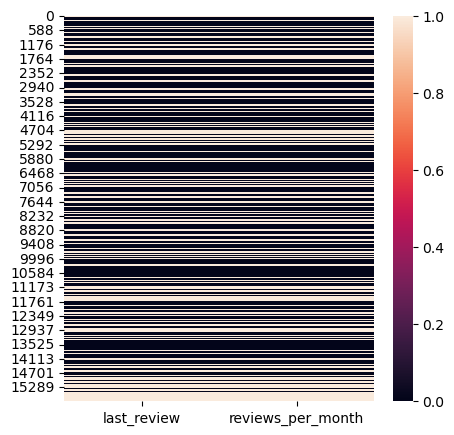

In [1514]:
plt.figure(figsize=(5,5))
sns.heatmap(airbnb[['last_review','reviews_per_month']].isna())

Proses penyaringan data mengungkapkan bahwa nilai yang hilang pada kolom **'last_review'** dan **'reviews_per_month'** muncul secara konsisten pada baris yang sama, yang berjumlah 5.789 entri.

Selain itu, dalam semua kasus di mana nilai-nilai ini hilang, kolom **'number_of_reviews'** bernilai 0. Hal ini menunjukkan bahwa ketidakadaan ulasan untuk listing ini yang menyebabkan data hilang pada kolom **'last_review'** dan **'reviews_per_month'**.

In [1517]:
airbnb[(airbnb["number_of_reviews"] == 0) & (airbnb["last_review"].isna()) & (airbnb["reviews_per_month"].isna())].head()

,id,name,host_id,host_name,neighbourhood,room_type,latitude,longitude,price,minimum_nights,availability_365,calculated_host_listings_count,number_of_reviews,number_of_reviews_ltm,reviews_per_month,last_review,host_response_rate,review_scores_rating
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,Private room,13.66818,100.61674,1316,1,358,2,0,0,NaN,NaN,NaN,NaN
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,Private room,13.75232,100.62402,800,60,365,1,0,0,NaN,NaN,NaN,NaN
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,Private room,13.76872,100.63338,1905,1,365,3,0,0,NaN,NaN,100%,4.0
7,1738669,1 chic bedroom apartment in BKK,7045870,Jiraporn,Chatu Chak,Entire home/apt,13.82925,100.56737,1461,1,365,1,0,0,NaN,NaN,NaN,NaN
14,959254,"Deluxe Condo, Nana, Pool/GYM/Sauna",5153476,Natcha,Khlong Toei,Entire home/apt,13.71516,100.56806,1400,30,365,1,0,0,NaN,NaN,NaN,NaN


Karena kolom **'last_review'** dan **'reviews_per_month'** berbagi baris yang sama dengan **'number_of_reviews'** yang bernilai 0, kami akan mengganti nilai yang hilang pada **'last_review'** dan **'reviews_per_month'** dengan 0 juga.

In [1520]:
# mengubah tipe data menjadi datetime
airbnb["last_review"] = pd.to_datetime(airbnb["last_review"], errors="coerce")
airbnb["last_review"].fillna(pd.to_datetime("1970-01-01"), inplace=True)

airbnb["reviews_per_month"].fillna(0, inplace=True)

In [1522]:
airbnb[["last_review", "reviews_per_month"]].isnull().sum()

last_review          0
reviews_per_month    0
dtype: int64

Nilai yang hilang telah berhasil diganti.

**`host_response_rate`**

In [1526]:
airbnb[airbnb['host_response_rate'].isna()].head()

,id,name,host_id,host_name,neighbourhood,room_type,latitude,longitude,price,minimum_nights,availability_365,calculated_host_listings_count,number_of_reviews,number_of_reviews_ltm,reviews_per_month,last_review,host_response_rate,review_scores_rating
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,Private room,13.66818,100.61674,1316,1,358,2,0,0,0.00,1970-01-01,NaN,NaN
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,Private room,13.75232,100.62402,800,60,365,1,0,0,0.00,1970-01-01,NaN,NaN
6,48736,Condo with Chaopraya River View,222005,Athitaya,Rat Burana,Private room,13.68556,100.49535,1558,3,365,1,1,0,0.01,2014-02-03,NaN,5.0
7,1738669,1 chic bedroom apartment in BKK,7045870,Jiraporn,Chatu Chak,Entire home/apt,13.82925,100.56737,1461,1,365,1,0,0,0.00,1970-01-01,NaN,NaN
8,1744248,"Batcave, Pool view, near Chatuchak",9181769,Nol,Chatu Chak,Entire home/apt,13.81693,100.56433,1558,3,365,1,10,0,0.09,2016-03-29,NaN,NaN


Mengecek korelasi kolom `host_response_rate` terhadap kolom lainnya.

In [1529]:
airbnb['host_response_rate'] = airbnb['host_response_rate'].str.replace('%', '').astype(float)
correlation_matrix = airbnb[['host_response_rate', 'review_scores_rating', 'number_of_reviews', 
                             'reviews_per_month', 'number_of_reviews_ltm', 'availability_365']].corr(method='spearman')
print(correlation_matrix)

                       host_response_rate  review_scores_rating  \
host_response_rate               1.000000              0.121098   
review_scores_rating             0.121098              1.000000   
number_of_reviews                0.226376             -0.125533   
reviews_per_month                0.234645             -0.077438   
number_of_reviews_ltm            0.225586             -0.067297   
availability_365                -0.161276             -0.098805   

                       number_of_reviews  reviews_per_month  \
host_response_rate              0.226376           0.234645   
review_scores_rating           -0.125533          -0.077438   
number_of_reviews               1.000000           0.891989   
reviews_per_month               0.891989           1.000000   
number_of_reviews_ltm           0.705398           0.813347   
availability_365               -0.264195          -0.252096   

                       number_of_reviews_ltm  availability_365  
host_response_rate     

Dari matriks korelasi, nilai korelasi antara `host_response_rate` dan kolom lain relatif rendah, Ini menunjukkan bahwa `host_response_rate` tidak memiliki hubungan yang kuat dengan kolom lainnya.

In [1532]:
airbnb[airbnb['host_id']==323158]

,id,name,host_id,host_name,neighbourhood,room_type,latitude,longitude,price,minimum_nights,availability_365,calculated_host_listings_count,number_of_reviews,number_of_reviews_ltm,reviews_per_month,last_review,host_response_rate,review_scores_rating
17,66046,"24Flr- 1br Apt near JJ, MRT, BTS",323158,Sue,Chatu Chak,Entire home/apt,13.82298,100.56484,122594,2,180,6,9,0,0.09,2020-03-04,NaN,NaN
593,5011036,Modern 1 BR Apr near Khaosan road,323158,Sue,Bangkok Noi,Entire home/apt,13.77368,100.48079,999,3,295,6,19,0,0.22,2020-05-16,NaN,NaN
7714,34069859,Modern 1 BR apr near Airport link on the Rama 9.,323158,Sue,Bang Kapi,Entire home/apt,13.74625,100.60626,999,3,210,6,3,0,0.07,2020-02-25,NaN,NaN
7789,34656045,Rama 9 - Modern 1BR apt near Airport link,323158,Sue,Suanluang,Entire home/apt,13.74543,100.60471,1009,2,211,6,12,1,0.28,2022-06-04,NaN,NaN
14875,755348633007471879,Lovely 2-Bedroom Condo in near Wat Prakeaw,323158,Sue,Bang Phlat,Entire home/apt,13.78144,100.47529,2500,3,212,6,0,0,0.00,1970-01-01,NaN,NaN
15012,757511805539046082,31fl-2 bedroom Pratunum Luxury Condo next to Siam,323158,Sue,Ratchathewi,Entire home/apt,13.75052,100.53950,3500,3,359,6,0,0,0.00,1970-01-01,NaN,NaN


Tampak bahwa `host_response_rate` berkaitan dengan `host_id`. Jika sebuah `host_id` memiliki `calculated_listing_count` lebih dari 1, maka semua listing miliknya memiliki nilai NaN pada `host_response_rate`.

In [1535]:
median_response_rate = airbnb.groupby('calculated_host_listings_count')['host_response_rate'].median()
nan_response_rate = airbnb.groupby('calculated_host_listings_count')['host_response_rate'].apply(lambda x: x.isna().median())

response_analysis = pd.DataFrame({
    'average_host_response_rate': median_response_rate,
    'nan_proportion': nan_response_rate
})
print(response_analysis.head(20))
print(response_analysis.tail(20))

                                average_host_response_rate  nan_proportion
calculated_host_listings_count                                            
1                                                    100.0             1.0
2                                                    100.0             1.0
3                                                    100.0             1.0
4                                                    100.0             0.0
5                                                    100.0             0.0
6                                                    100.0             0.0
7                                                    100.0             0.0
8                                                    100.0             0.0
9                                                    100.0             0.0
10                                                   100.0             0.0
11                                                   100.0             0.0
12                       

Berdasarkan data, Host dengan banyak listing cenderung memiliki nilai host_response_rate yang lebih rendah atau NaN karena kesulitan mengelola banyak properti dan permintaan tamu.

Oleh karena itu, langkah yang diambil adalah mengisi nilai **`host_response_rate`** dengan median dari kelompok yang dibentuk berdasarkan **`calculated_host_listings_count`**.

In [1538]:
airbnb['host_response_rate'] = airbnb.groupby('calculated_host_listings_count')['host_response_rate'].transform(lambda x: x.fillna(x.median()))
print(airbnb['host_response_rate'].isna().sum())

0


Nilai yang hilang telah berhasil diganti.

### **Feature Engineering**

**Kategorisasi `neighborhood` (Inner, Middle, Outer City)**
Alasan:
- Memudahkan analisis pola spasial rating berdasarkan karakteristik area yang lebih luas
- Area berbeda memiliki aksesibilitas dan fasilitas yang berbeda yang dapat mempengaruhi ekspektasi tamu
- Selama pandemi, preferensi lokasi mungkin berubah (misalnya dari inner city ke outer city untuk menghindari keramaian)
- Membantu mengidentifikasi apakah dampak COVID-19 terhadap rating berbeda berdasarkan lokasi strategis properti

Data tiga bagian area bangkok diambil dari 
**Environmental Technology Management towards Energy Saving for Transportation in Bangkok, Thailand**
Journal of Economics, Business and Management (JOEBM)
https://www.joebm.com/vol5/496-MA0015.pdf › vol5


Pengelompokan neighbourhood menjadi 3 bagian berdasarkan karakteristik sebagai berikut:
- Inner City: Memiliki kepadatan tinggi, akses transportasi beragam, serta kenyamanan dengan fasilitas lengkap.
- Middle City: Memiliki kepadatan yang sedang, akses transportasi yang beragam, dan fasilitas yang tersebar lebih merata.
- Outer City: Memiliki ruang yang lebih luas dan bebas, fasilitas untuk perjalanan dengan jalan yang terang, serta dekat dengan fasilitas dasar.

Perbedaannya terletak pada tingkat kepadatan, distribusi fasilitas, dan aksesibilitas transportasi, yang menunjukkan perbedaan tipe lingkungan di pusat kota, area tengah, dan pinggiran kota.

In [1544]:
inner_city_districts = [
    'Ratchathewi', 'Din Daeng', 'Bang Kho laen', 'Khlong San', 'Sathon', 'Khlong Toei', 'Bangkok Yai', 'Huai Khwang', 
    'Bang Sue', 'Parthum Wan', 'Phra Nakhon', 'Thon buri', 'Yan na wa', 'Dusit', 'Samphanthawong', 'Bang Phlat', 'Bangkok Noi',
    'Pom Prap Sattru Phai', 'Chatu Chak', 'Bang Rak',  'Phaya Thai', 'Vadhana']


middle_city_districts = [
    'Bang Na', 'Bang Kapi', 'Rat Burana', 'Sai Mai', 'Wang Thong Lang', 'Phasi Charoen', 'Phra Khanong',
    'Thawi Watthana', 'Pra Wet', 'Suanluang', 'Don Mueang', 'Lak Si', 'Bueng Kum', 'Saphan Sung', 'Khan Na Yao', 'Bang Khen', 
    'Lat Phrao', 'Chom Thong', 'Nong Khaem', 'Thung khru', 'Taling Chan', 'Bang Khae'] 


outer_city_districts = [
    'Lat Krabang', 'Min Buri', 'Khlong Sam Wa', 'Bang Khun thain', 'Bang Bon', 'Nong Chok']


# Fungsi untuk mengkategorikan neighbourhood
def categorize_area(neighbourhood):
    if neighbourhood in inner_city_districts:
        return 'Inner City'
    elif neighbourhood in middle_city_districts:
        return 'Middle City'
    elif neighbourhood in outer_city_districts:
        return 'Outer City'

airbnb['area_category'] = airbnb['neighbourhood'].apply(categorize_area)

## **Examining Data Distribution**

Memahami distribusi data sangat penting karena beberapa alasan:

- **Mengidentifikasi Kemiringan**: Menentukan apakah data simetris atau miring, yang memengaruhi pemilihan uji statistik dan model.
- **Memilih Model yang Tepat**: Beberapa model mengasumsikan distribusi data yang normal, jadi memahami distribusi membantu dalam pemilihan model.
- **Kebutuhan Transformasi Data**: Data yang tidak normal mungkin memerlukan transformasi agar analisis lebih akurat.

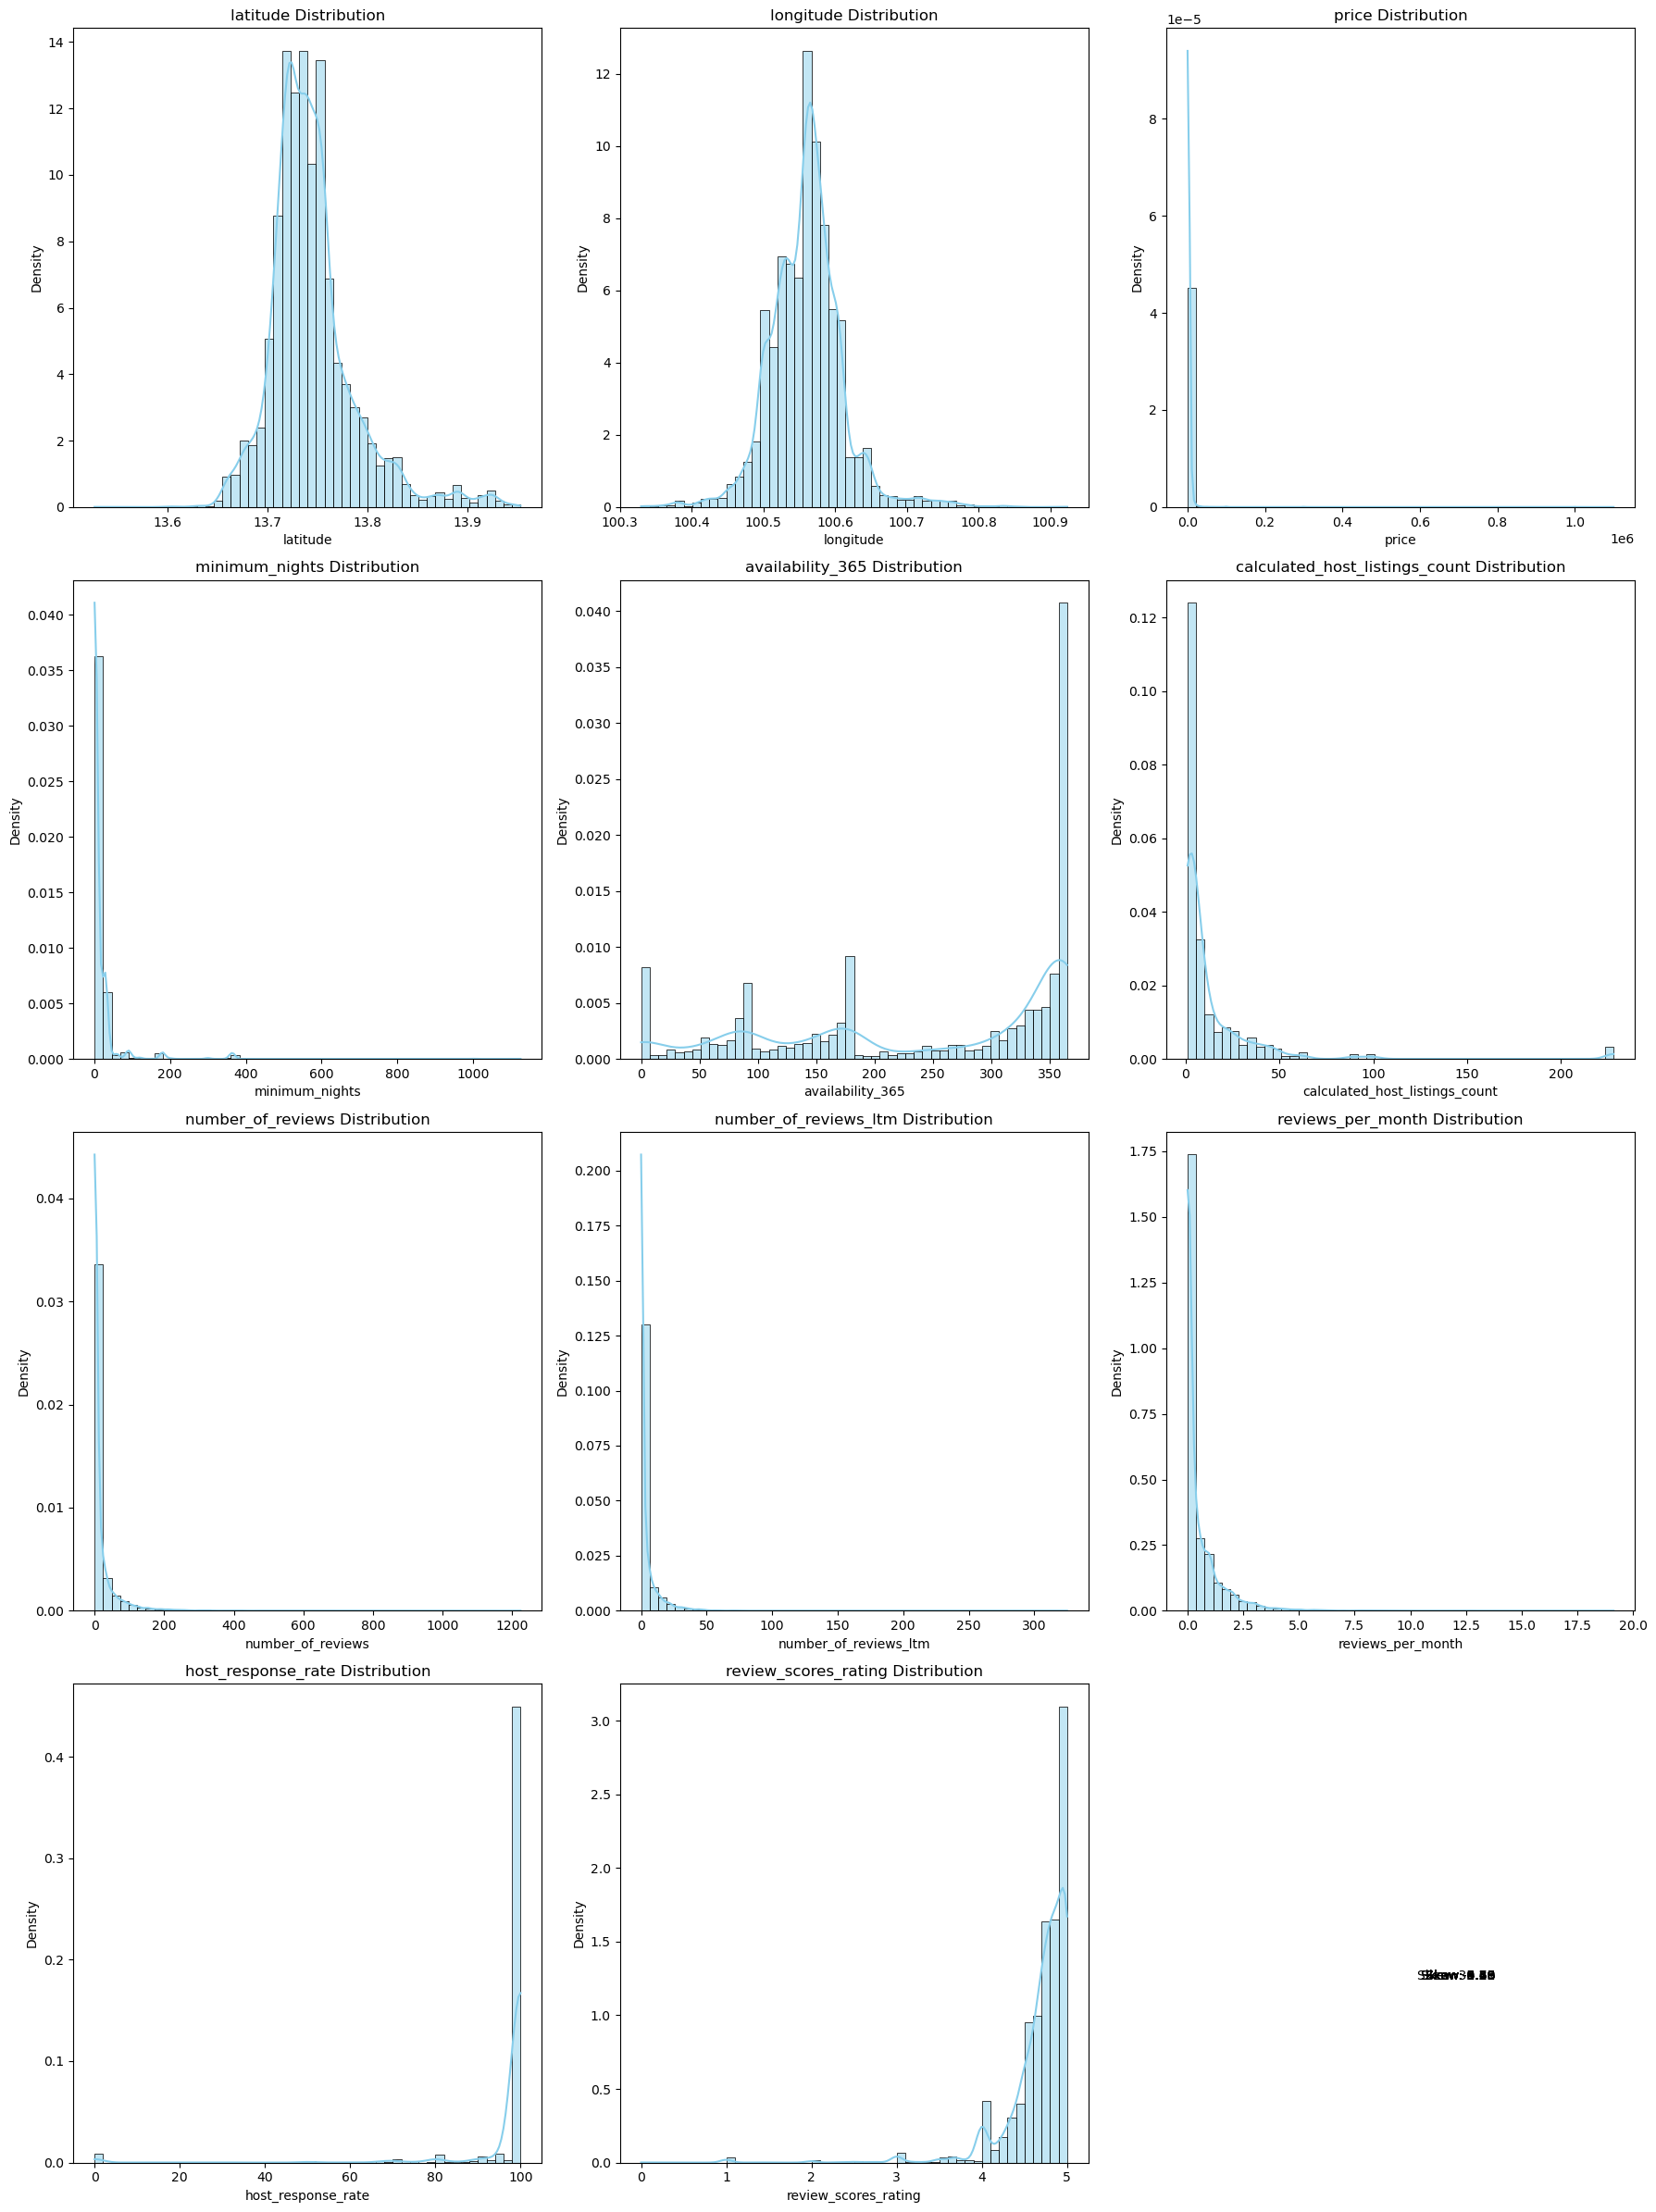

,Shapiro-Wilk p-value,D'Agostino p-value,Skewness,Skew Direction,Shapiro-Wilk Normal,D'Agostino Normal,Normally Distributed
latitude,0.0,0.0,1.401384,Positive,False,False,False
longitude,0.0,0.0,0.559228,Positive,False,False,False
price,0.0,0.0,33.882198,Positive,False,False,False
minimum_nights,0.0,0.0,8.229398,Positive,False,False,False
availability_365,0.0,0.0,-0.576219,Negative,False,False,False
calculated_host_listings_count,0.0,0.0,5.386583,Positive,False,False,False
number_of_reviews,0.0,0.0,6.261361,Positive,False,False,False
number_of_reviews_ltm,0.0,0.0,9.725723,Positive,False,False,False
reviews_per_month,0.0,0.0,4.628295,Positive,False,False,False
host_response_rate,0.0,0.0,-5.614197,Negative,False,False,False


In [1548]:
numerical_columns = airbnb.select_dtypes(include=["int64", "float64"]).drop(['id', 'host_id'], axis=1).columns

num_cols = len(numerical_columns)
rows = (num_cols + 2) // 3
plt.figure(figsize=(18, 6 * rows))

normality_test_results = {}

for i, col in enumerate(numerical_columns):
    plt.subplot(rows, 3, i + 1)
    sns.histplot(airbnb[col], kde=True, color="skyblue", stat="density", bins=50)
    plt.title(f"{col} Distribution")
    plt.xlabel(col)
    plt.ylabel("Density")
    
    shapiro_stat, shapiro_p = stats.shapiro(airbnb[col])
    dagostino_stat, dagostino_p = stats.normaltest(airbnb[col])
    
    skewness = airbnb[col].skew()
    skew_text = f"Skew: {skewness:.2f}\n"
    
    normality_test_results[col] = {
        "Shapiro-Wilk p-value": shapiro_p,
        "D'Agostino p-value": dagostino_p,
        "Skewness": skewness,
        "Skew Direction": "Positive" if skewness > 0 else ("Negative" if skewness < 0 else "None"),
        "Shapiro-Wilk Normal": shapiro_p > 0.05,
        "D'Agostino Normal": dagostino_p > 0.05
    }
    
    plt.figtext(0.9, 0.1, skew_text, ha='right', fontsize=10)

plt.tight_layout()
plt.show()

normality_results_df = pd.DataFrame(normality_test_results).T
normality_results_df["Normally Distributed"] = normality_results_df["Shapiro-Wilk Normal"] & normality_results_df["D'Agostino Normal"]
normality_results_df

In [1439]:
airbnb.to_csv('airbnb_cleaned.csv', index=False)

## **Exploratory Data Analysis (EDA)**

Untuk melanjutkan analisis data eksplorasi, silakan merujuk pada file berikut untuk kelanjutan analisis secara mendetail. Bagian selanjutnya ini akan membahas lebih dalam untuk mengungkap pola, tren, dan wawasan dalam dataset.